In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import binom, beta
import preliz as pz
import seaborn as sns
# az.style.use("arviz-grayscale")


#### BetaBinomial
* It's cool, lets us reason about the number of successes in n trials given an unknown value for probability of success in a single trial
    * That is: Say we have 20 coin flips, 10 heads, 10 tails, so Beta(10, 10). And then the BetaBinomial gets an additional parameter of n, which represents the next n trials.

In [2]:
pz.BetaBinomial(alpha=10, beta=10, n=5).plot_interactive()

interactive(children=(FloatSlider(value=10.0, description='alpha (0, inf)', max=110.0, min=2.220446049250313e-…

In [3]:
# simulating a 100 draws from a betabinomial. Each draw gives us a number of successes in a 100 trials

coin_flips = []

for i in range(100):
    coin_flip = pz.BetaBinomial(alpha=10, beta=10, n=100).rvs()
    coin_flips.append(coin_flip)

<Axes: ylabel='Count'>

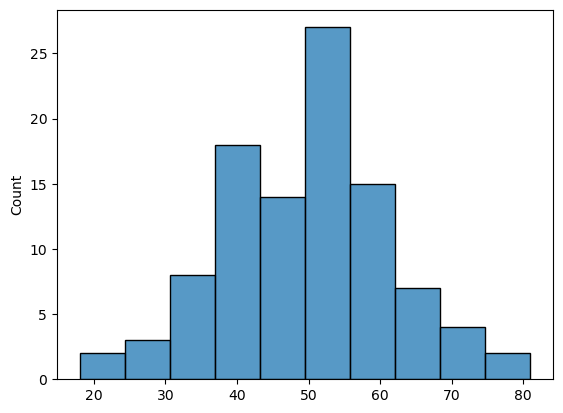

In [4]:
sns.histplot(coin_flips)

<Axes: ylabel='Count'>

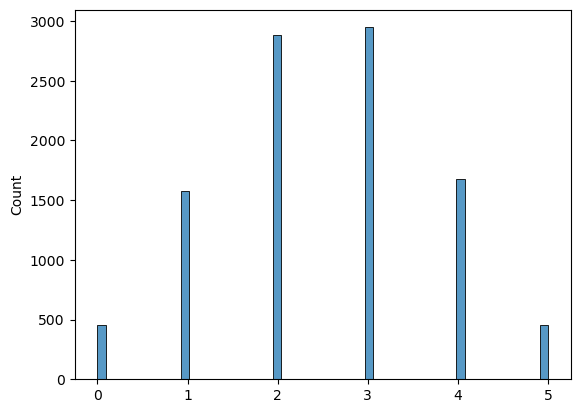

In [5]:
# We can also do it like this, here we draw 10000 samples from betabinomial, for the next 5 bernoulli trials
# With probabilty drawn for each sample from the beta(10,10)

# Drawing 10,000 samples from a Beta-binomial distribution. 
# Each sample represents the number of successes in 5 Bernoulli trials, 
# with the success probability for each sample drawn from Beta(10, 10).

sns.histplot(data=pz.BetaBinomial(alpha=10, beta=10, n=5).rvs(10000))

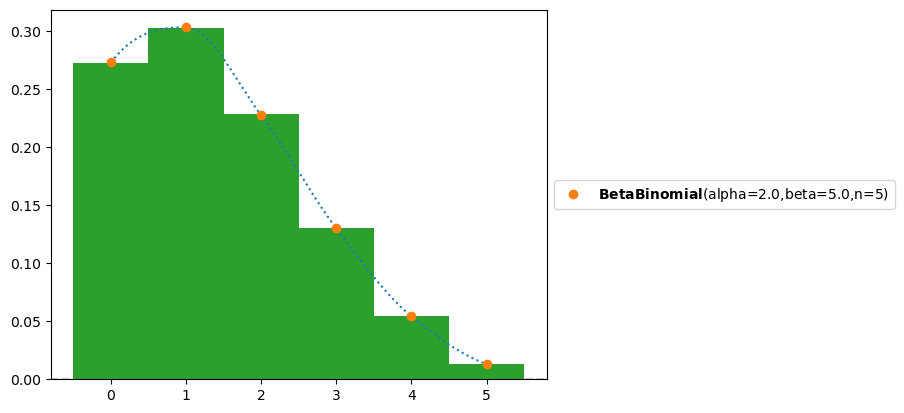

In [6]:
plt.hist(pz.BetaBinomial(alpha=2, beta=5, n=5).rvs(1000000),
         bins=[0, 1, 2, 3, 4, 5, 6], density=True, align="left", color="C2")
pz.BetaBinomial(alpha=2, beta=5, n=5).plot_pdf();

#### A little normal distribution
* Hopefully with preliz

In [7]:
pz.Normal(mu=0, sigma=1).plot_interactive()

interactive(children=(FloatSlider(value=0.0, description='mu (-inf, inf)', max=10.0, min=-10.0, style=SliderSt…

In [8]:
# Computing probabilites for ranges of values in continous probabilty distributions

In [9]:
dist = pz.Normal(0,1)
lower_bound = -2
upper_bound = 0

cdf_less_than_minus_2 = dist.cdf(x=lower_bound)
cdf_less_than_0 = dist.cdf(x=upper_bound)

cdf_less_than_0-cdf_less_than_minus_2

0.4772498680518208

#### Expected values of distributions

<Axes: title={'center': '$\\bf{StudentT}$(nu=3.0,mu=0.0,sigma=1.0)\nμ=0, σ=1.73, γ=nan, κ=inf'}>

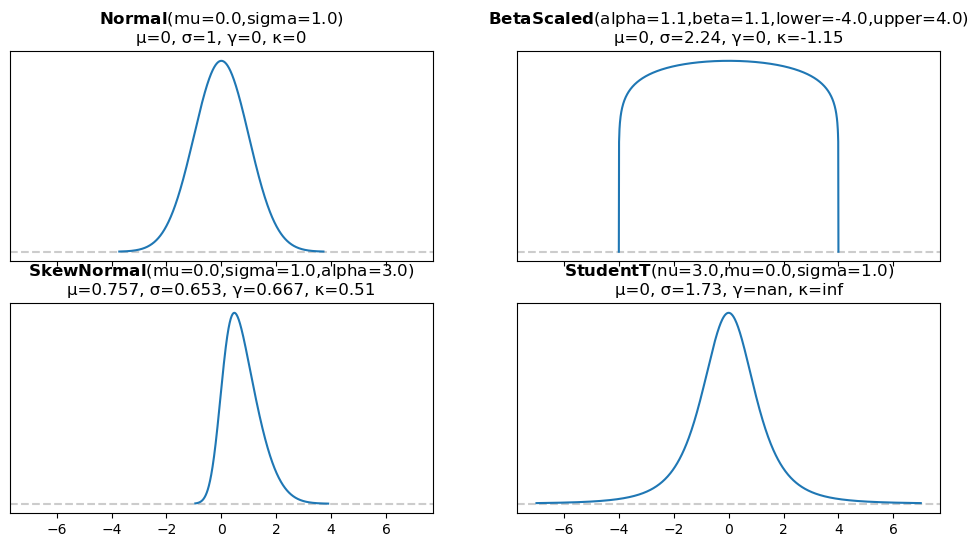

In [10]:
_, ax = plt.subplots(2, 2, figsize=(12, 6), sharex=True)
pz.Normal(0, 1).plot_pdf(ax=ax[0, 0], moments=["m", "d", "s", "k"], legend="title")
pz.BetaScaled(1.1, 1.1, -4, 4).plot_pdf(ax=ax[0, 1], moments=["m", "d", "s", "k"], legend="title")
pz.SkewNormal(0, 1, 3).plot_pdf(ax=ax[1, 0], moments=["m", "d", "s", "k"], legend="title")
pz.StudentT(3, 0, 1).plot_pdf(ax=ax[1, 1], moments=["m", "d", "s", "k"], legend="title", support=(-7, 7))

### Single parameter inference
#### Coin tossing

Choosing the likelihood: Binomial Distribution

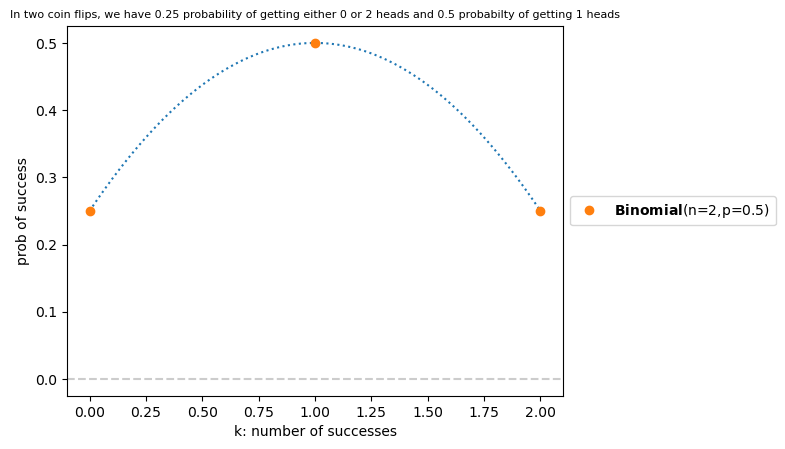

In [11]:
pz.Binomial(n=2, p=0.5).plot_pdf()
plt.ylabel("prob of success")
plt.xlabel("k: number of successes")
plt.title("In two coin flips, we have 0.25 probability of getting either 0 or 2 heads and 0.5 probabilty of getting 1 heads", fontsize=8)
plt.show()

Choosing the prior: Beta Distribution

In [12]:
pz.Beta(alpha=1, beta=1).plot_interactive()

interactive(children=(FloatSlider(value=1.0, description='alpha (0, inf)', max=11.0, min=2.220446049250313e-16…

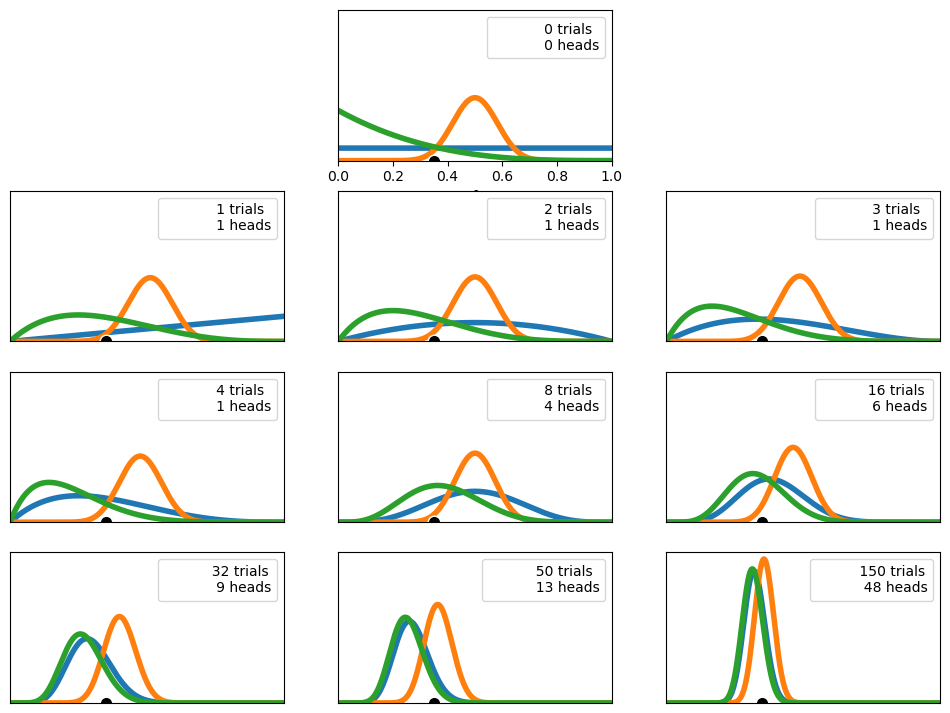

In [13]:
plt.figure(figsize=(12, 9))

n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
n_heads = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]
theta_real = 0.35

beta_params = [(1, 1), (20, 20), (1, 4)]
x = np.linspace(0, 1, 2000)

for idx, N in enumerate(n_trials):
    if idx == 0:
        plt.subplot(4, 3, 2)
        plt.xlabel('θ')
    else:
        plt.subplot(4, 3, idx+3)
        plt.xticks([])
    y = n_heads[idx]
    for (α_prior, β_prior) in beta_params:
        posterior = pz.Beta(α_prior + y, β_prior + N - y).pdf(x)
        plt.plot(x, posterior, lw=4)

    plt.plot(theta_real, 0, ms=9, marker='o', mec='w', mfc='k')
    plt.plot(0, 0, label=f'{N:4d} trials\n{y:4d} heads', alpha=0)
    plt.xlim(0, 1)
    plt.ylim(0, 12)
    plt.legend()
    plt.yticks([])


Checking if the mode of the distribution (peak) is equal with maximum likelihood point estimation
* It is. MLE is equivalent to setting a uniform prior and then taking the mode of the distribution

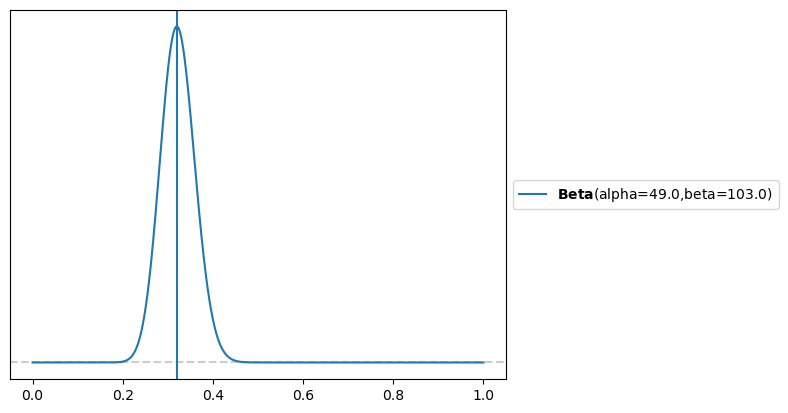

In [14]:
beta_dist = pz.Beta(alpha=49, beta=150-48+1)
beta_dist.plot_pdf()
plt.axvline(x=48/150)

#### Choosing priors
* We will be using weakly informative priors. Usually we can do better than noninformative priors and can force the posterior distribution of a parameter to be in certain reasonable bounds. Weakly informative priors are also known as regularizing priors for that reason.
Preliz can be useful:
* Say we want to visualise our prior information and compute params of a beta distribution that satisfies some constraints
    * Like here, we see a Beta dist with 90% of its mass betwen 0.1 and 0.7
* That maxent method is maximum entropy - it finds the beta parameters satysfying the constraints with the least amount of information.

By the way, prior elicitation is not exactly the process of choosing priors, but one of ways or processes to choose priors
* Prior elicitation is the process of systematically gathering expert knowledge and transforming it into prior probability distributions for Bayesian models.

(<Axes: >,
  message: Optimization terminated successfully
  success: True
   status: 0
      fun: 0.30105907090670136
        x: [ 2.475e+00  3.610e+00]
      nit: 9
      jac: [ 2.580e-03  1.028e-01]
     nfev: 29
     njev: 9)

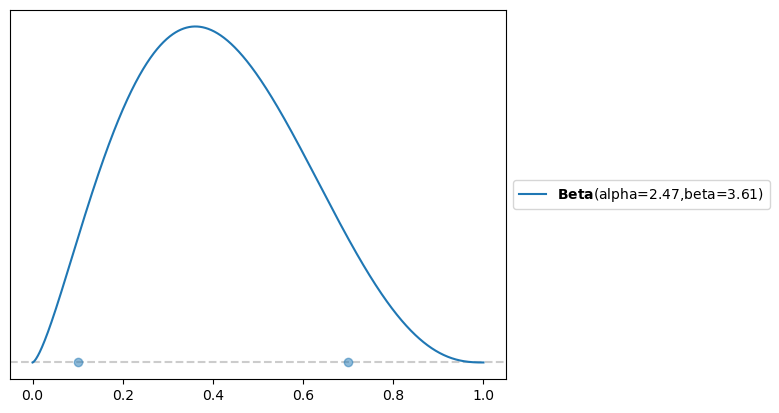

In [15]:
dist = pz.Beta()
pz.maxent(distribution=dist, lower=0.1, upper=0.7)

#### HDI: Highest Density Interval
* shortest interval containing a given portion of the probability density
* so if we say the 95 % HDI is from 2 to 5 it means the true parameter value is between 2 and 5 with 95% probability.
* ArviZ defaults to 94 HDI as a reminder of the arbitrary nature of the HDI value

<Axes: title={'center': 'theta'}>

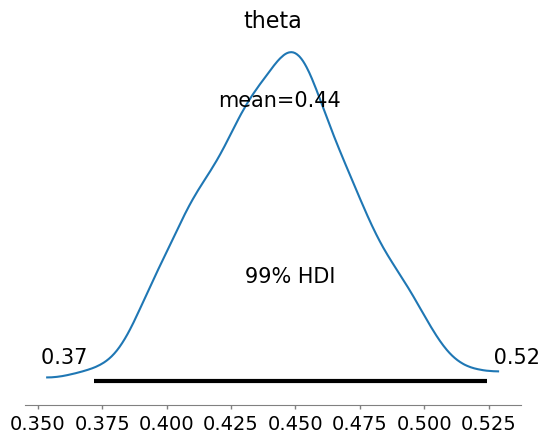

In [16]:
random_samples_from_beta = pz.Beta(120,150).rvs(1000)
az.plot_posterior(data={"theta":random_samples_from_beta}, hdi_prob=0.99)

#### EXERCICES

#### 1. *Suppose you have a jar with 4 jelly beans: 2 are strawberry-flavored, 1 is blueberry-flavored, and 1 is cinnamon-flavored. You draw one jelly bean at random from the jar.*

1. *What is the sample space for this experiment?
1. *We define event $A$ as the jelly bean drawn is strawberry-flavored and event $B$ as The jelly bean drawn is not cinnamon-flavored. What are the probabilities of events $A$ and $B$?*
1. *Are events $A$ and $B$ mutually exclusive? Why or why not?*

1. The sample space is {strawberry, strawberr, blueberry, cinammon}
2. P(A) = 1/2, P(B) = 3/4
3. They are not mutually exclusive, as drawing a strawberry bean is also satisfying the condition of drawing a not cinammon bean

#### 2. *Previously, we defined a Python function `P` to compute the probability of an event using the naive definition of probability.*

*Generalize that function to compute the probability of events when they are not all equally likely. Use this new function to
compute the probability of events $A$ and $B$ from the previous exercise.*

In [17]:
S = {(0,0), (0,1), (1,1), (1,0)}
A = {(0,0)}

In [18]:
def P(S, A):
    if A.issubset(S):
        return len(A)/len(S)
    else:
        return 0
P(S=S, A=A)

0.25

In [19]:
s = {("Strawberry", "Strawberry", "Blueberry", "Cinnamon")}
A = "Strawberry"

In [20]:
from collections import Counter

S = ["Strawberry", "Strawberry", "Blueberry", "Cinnamon"]  # Use a list to allow duplicates
A = "Blueberry"

# Compute frequency-based probabilities
def P_generalized(S, A):
    count_S = Counter(S)  # Count occurrences of each event
    total = len(S)  # Total number of events
    return count_S[A] / total if A in count_S else 0

print(P_generalized(S, A))  


0.25


#### 4. *We discussed the probability mass/density functions and the cumulative density function. But there are other ways to represent functions like the percentile point function ppf.*

*Using the plot_ppf method of PreliZ, plot the percentile point function for the BetaBinomial and Gaussian distributions.*

<Axes: >

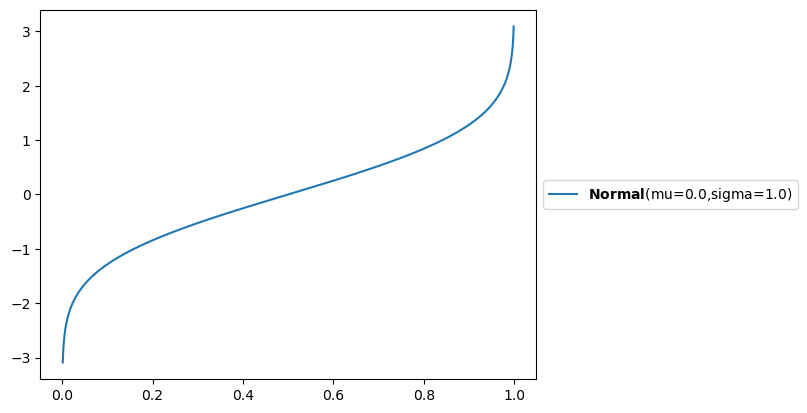

In [21]:
normal_dist=pz.Normal(mu=0, sigma=1)
normal_dist.plot_ppf()

*Can you explain how the ppf is related to the cdf and pmf/pdf?*

The ppf is the inverse of the cdf. We can see that the previous point, but maybe it is easier to see if we first compute the cdf for a given value $x$ and use the result as input of the ppf function. 

x = ppf(cdf(x))

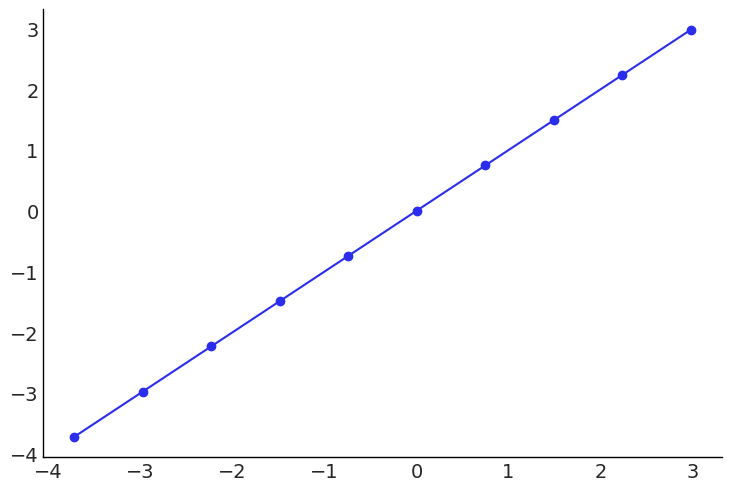

In [ ]:
dist = pz.Normal(0, 1)

# we ask preliz for values on the support of the distribution
# we just take every other 100th, i.e. 10 values.
x_values = dist.xvals("full")[::100]
# compute the cdf for all these values
# Notice these operations are vectorized
cdf_v = dist.cdf(x_values)
ppf_v = dist.ppf(cdf_v)
plt.plot(x_values, ppf_v, "-o");

#### 5 *From the following expressions, which one corresponds to the sentence "the probability of being sunny, given that it is the 9th of July of 1816"?*

- p(sunny)
- p(sunny | July)
- p(sunny | 9th of July of 1816)
- p(9th of July of 1816 | sunny)
- p(sunny, 9th of July of 1816) / p(9th of July of 1816)

#### 6. *Show that the probability of choosing a human at random and picking the Pope is not the same as the probability of the Pope being human.*

In [ ]:
p_human_at_random = 1/8e9
p_pope_is_human = 1

#### 7. *Following the example in Figure 1.9, use PreliZ to compute the moments for the SkewNormal distribution for a different combination of parameters. Generate random samples of different sizes, like 10, 100, and 1,000, and see if you can recover the values of the first two moments (mean and variance) from the samples. What do you observe?* 

<Axes: >

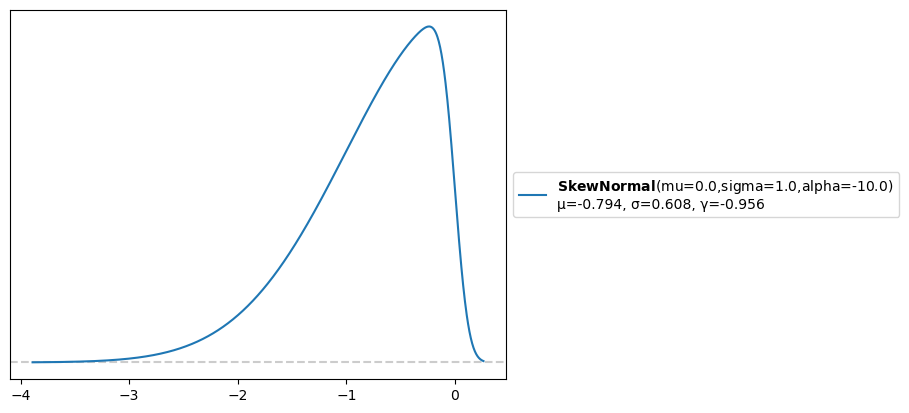

In [31]:
skew_normal = pz.SkewNormal(mu=0, sigma=1, alpha=-10)
skew_normal.plot_pdf(moments=["m", "d", "s"])

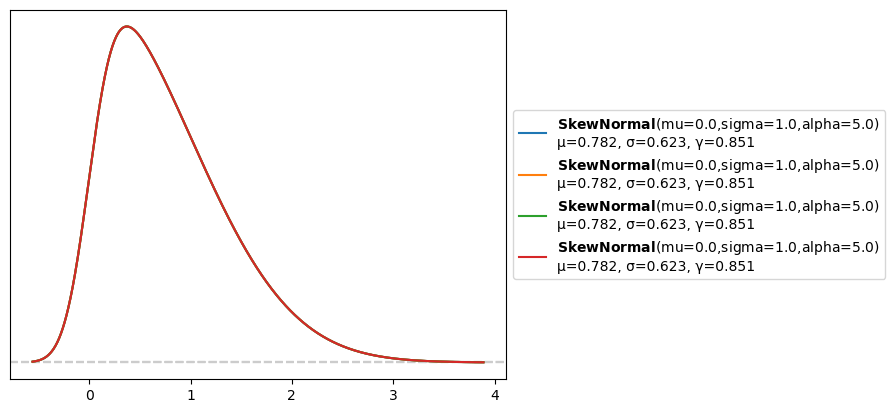

In [41]:
sample_sizes = [10, 100, 1000, 10000]
samples = []

for sample_size in sample_sizes:
    sn = pz.SkewNormal(mu=0, sigma=1, alpha=5)
    sample = sn.rvs(sample_size)
    samples.append(sample)
    
    sn.plot_pdf(moments=['m', 'd', 's'])
    # samples.append(00000000000000000)

In [42]:
samples[0].mean()

0.7645573493161023

In [43]:
samples[1].mean()

0.7617883497563911

In [44]:
samples[2].mean()

0.7928629539258073

In [45]:
samples[3].mean()

0.7883800791256427

In [46]:
samples[0].std()

0.5246183413487513

In [47]:
samples[3].std()

0.6294178690676425

#### 8. Repeat the previous exercise for the Student’s t-distribution. Try values of 𝜈 like 2, 3, 500. What do you observe?

<Axes: >

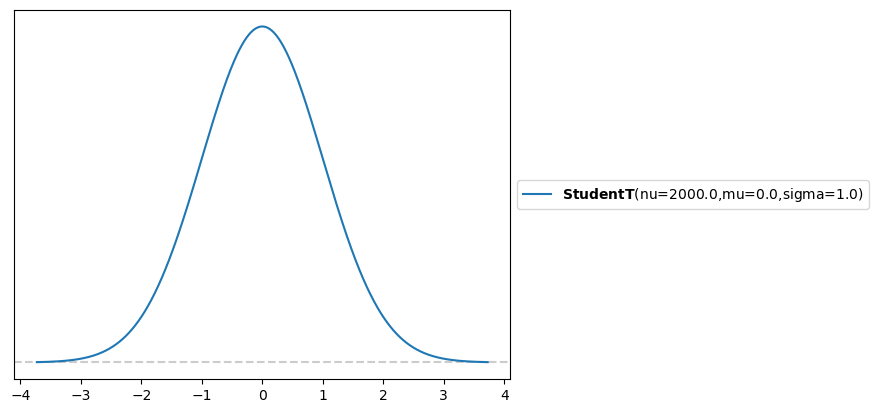

In [56]:
student_t = pz.StudentT(mu=0, sigma=1, nu=2000)
student_t.plot_pdf()

#### 9. *In the following definition of a probabilistic model, identify the prior and the likelihood:*

\begin{align}
y_i \sim& \text{Normal}(\mu, \sigma) \\
\mu \sim& \text{Normal}(0,10) \\
\sigma \sim& \text{HalfNormal}(25) 
\end{align}


mu - prior

sigma - prior

y_i - likelihood

#### 10. *In the previous model, how many parameters will the posterior have? Compare it with the model for the coin-flipping problem.*

The posterior will have 2 parameters, mu and sigma

In our coin flipping model we had one parameter, $\theta$. This is the only unknow. 

#### 11. *Write Bayes' theorem for the model in Exercise 9.*


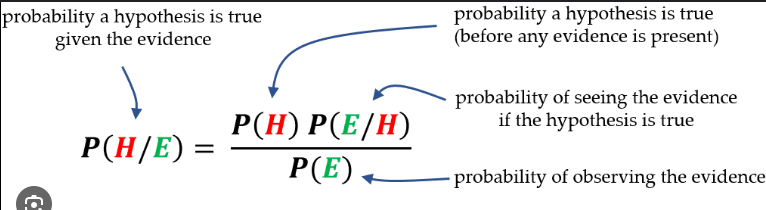

P(mu and sigma|Y) = P(mu and sigma)*P(Y|mu and sigma)/P(Y)

#### 12. *Let's suppose that we have two coins. When we toss the first coin, half the time it lands on tails and the other half on heads. The other coin is a loaded coin that always lands on heads. If we take one of the coins at random and get heads, what is the probability that this coin is the unfair one?*


P(biased|head) = (P(biased)*P(head|biased)/P(head))
P(head)=P(head∣fair)xP(fair)+P(head∣biased)xP(biased) = 0.5x0.5+1*0.5=0.25+0.5 = 0.75

= (0.5*1)/0.75 = 0.6666

#### Exercise 13
***


*Try re-plotting Figure 1.12 using other priors (beta_params) and other data (trials and data).*

First let's try with different priors

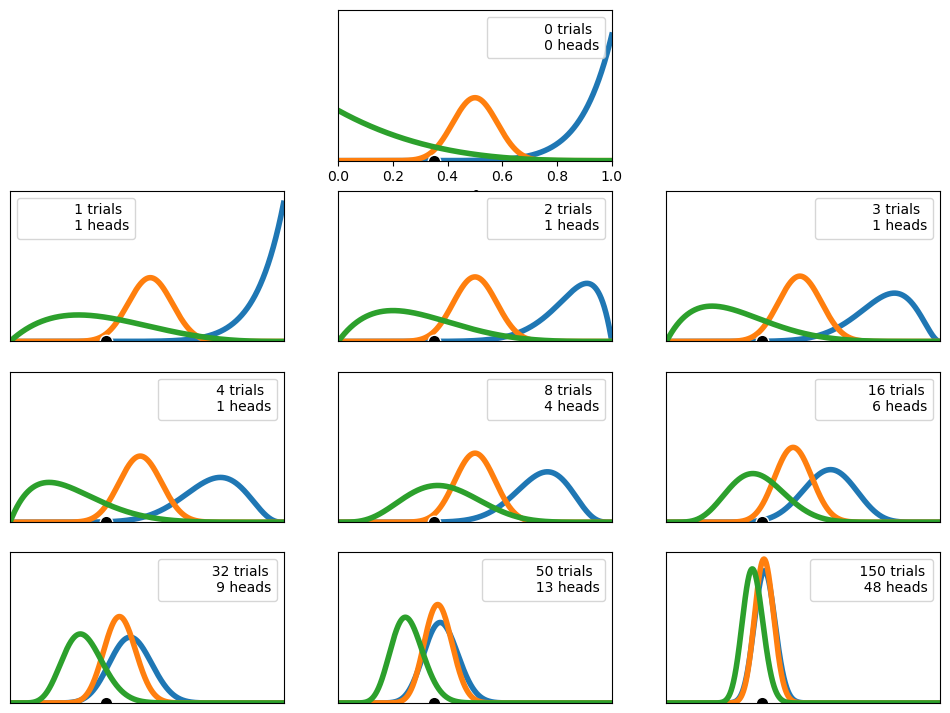

In [63]:
plt.figure(figsize=(12, 9))

n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
n_heads = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]
theta_real = 0.35

beta_params = [(10, 1), (20, 20), (1, 4)]
x = np.linspace(0, 1, 2000)

for idx, N in enumerate(n_trials):
    if idx == 0:
        plt.subplot(4, 3, 2)
        plt.xlabel('θ')
    else:
        plt.subplot(4, 3, idx+3)
        plt.xticks([])
    y = n_heads[idx]
    for (α_prior, β_prior) in beta_params:
        posterior = pz.Beta(α_prior + y, β_prior + N - y).pdf(x)
        plt.plot(x, posterior, lw=4)

    plt.plot(theta_real, 0, ms=9, marker='o', mec='w', mfc='k')
    plt.plot(0, 0, label=f'{N:4d} trials\n{y:4d} heads', alpha=0)
    plt.xlim(0, 1)
    plt.ylim(0, 12)
    plt.legend()
    plt.yticks([])
